<a href="https://colab.research.google.com/github/tripsysi/Wine_Classifier/blob/main/DATA7703_Project_Wine_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA7703 Project  - Wine Classifier

In [1]:
####################
import numpy as np
from numpy import where
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score, accuracy_score, mean_squared_error, roc_curve
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

from collections import Counter

## Read in data

In [2]:
redwine = pd.read_csv("https://raw.githubusercontent.com/tripsysi/Wine_Classifier/main/data/winequality-red.csv")
whitewine = pd.read_csv("https://raw.githubusercontent.com/tripsysi/Wine_Classifier/main/data/winequality-white.csv")

Citation : Data from https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
print(redwine.shape)
print(whitewine.shape)

(1599, 12)
(4898, 12)


## Preprocessing

### Preliminary EDA

#### Class Distributions in percentages

In [5]:
redwine['quality'].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [6]:
whitewine['quality'].value_counts(normalize=True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

#### Visualisation of the class distributions using PCA

Quality 7, 8, 9 are considered good <br>
5, 6 are average <br>
rest poor quality

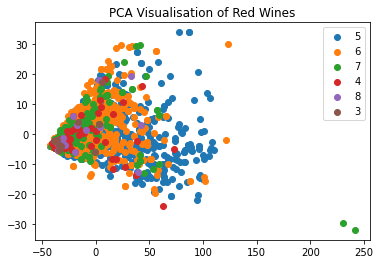

In [7]:
counter = Counter(redwine['quality'])
pca = PCA(n_components=2)
red_rwine = pca.fit_transform(redwine)
for label, _ in counter.items():
    row_ix = where(redwine['quality'] == label)[0]
    plt.scatter(red_rwine[row_ix, 0], red_rwine[row_ix, 1], label=str(label))
plt.legend()
plt.title("PCA Visualisation of Red Wines")
plt.show()

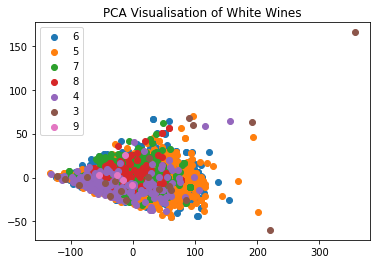

In [8]:
counter = Counter(whitewine['quality'])
pca = PCA(n_components=2)
red_wwine = pca.fit_transform(whitewine)
for label, _ in counter.items():
    row_ix = where(whitewine['quality'] == label)[0]
    plt.scatter(red_wwine[row_ix, 0], red_wwine[row_ix, 1], label=str(label))
plt.legend()
plt.title("PCA Visualisation of White Wines")
plt.show()

#### Correlations

### Merging Wine tables 

In [9]:
redwine.insert(11, 'Winetype', 0)
whitewine.insert(11, 'Winetype', 1)

In [10]:
print(redwine.shape)
print(whitewine.shape)

(1599, 13)
(4898, 13)


In [11]:
wines = pd.concat([redwine,whitewine])
wines.shape

(6497, 13)

In [12]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Winetype                0
quality                 0
dtype: int64

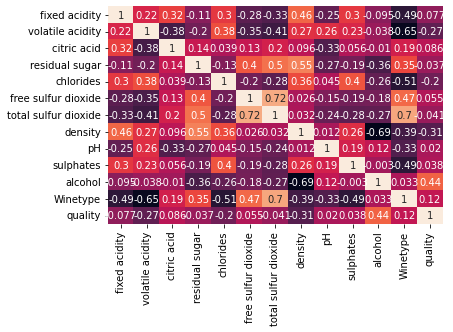

In [13]:
sns.heatmap(wines.corr(), annot=True, cbar=False);

### Wine quality buckets

In [14]:
wines['quality_label'] = wines.quality.apply(lambda x: 0 if x <= 5 \
                                             else 1 \
                                             if x <= 7 else 2)

In [15]:
wines['quality_label'].value_counts()

1    3915
0    2384
2     198
Name: quality_label, dtype: int64

In [16]:
wines['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### Visualisation of per class PCA

In [105]:
wines.shape

(6497, 14)

KeyError: ignored

In [115]:
#print("%.8f" %s)abs(pca.components_)
#'%f'%(abs(pca.components_))
with np.printoptions(precision=5, suppress=True):
    print(abs(pca.components_))

[[0.00741 0.00118 0.00049 0.04102 0.00017 0.23048 0.97215 0.      0.00066
  0.0007  0.00545 0.00517 0.00053 0.00033]
 [0.00537 0.00079 0.00025 0.01863 0.00007 0.9726  0.23137 0.      0.00065
  0.00035 0.00289 0.00295 0.00917 0.00545]]


The above implies the 6th and 7th columns are the most important

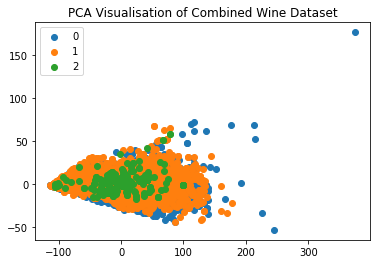

In [17]:
counter = Counter(wines['quality_label'])
pca = PCA(n_components=2)
wines_pca = pca.fit_transform(wines)
for label, _ in counter.items():
    row_ix = where(wines['quality_label'] == label)[0]
    plt.scatter(wines_pca[row_ix, 0], wines_pca[row_ix, 1], label=str(label))
plt.legend()
plt.title("PCA Visualisation of Combined Wine Dataset")
plt.show()

##### Class 0

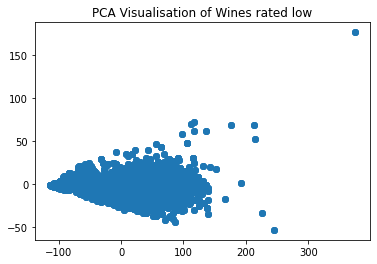

In [18]:
#counter = Counter(wines['quality_label'])
#pca = PCA(n_components=2)
wines_pca = pca.fit_transform(wines)
for label, _ in counter.items():
    row_ix = where(wines['quality_label'] == 0)[0]
    plt.scatter(wines_pca[row_ix, 0], wines_pca[row_ix, 1], color='C0')
#plt.legend()
plt.title("PCA Visualisation of Wines rated low")
plt.show()

##### Class 1

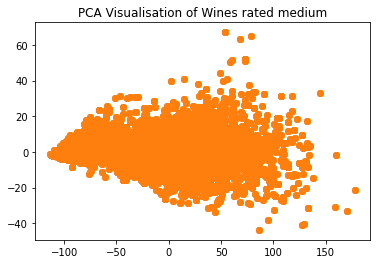

In [19]:
wines_pca = pca.fit_transform(wines)
for label, _ in counter.items():
    row_ix = where(wines['quality_label'] == 1)[0]
    plt.scatter(wines_pca[row_ix, 0], wines_pca[row_ix, 1], color='C1')
#plt.legend()
plt.title("PCA Visualisation of Wines rated medium")
plt.show()

##### Class 2

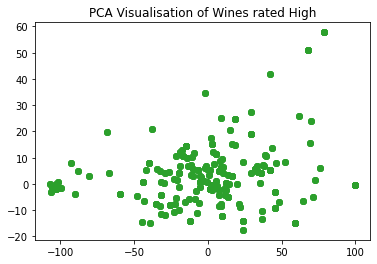

In [20]:
wines_pca = pca.fit_transform(wines)
for label, _ in counter.items():
    row_ix = where(wines['quality_label'] == 2)[0]
    plt.scatter(wines_pca[row_ix, 0], wines_pca[row_ix, 1], color='C2')
#plt.legend()
plt.title("PCA Visualisation of Wines rated High")
plt.show()

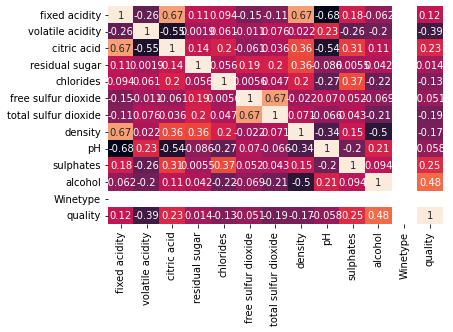

In [21]:
sns.heatmap(redwine.corr(), annot=True, cbar=False);

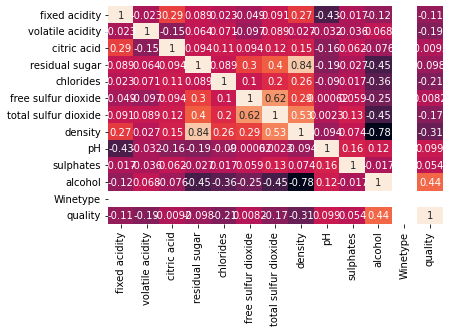

In [22]:
sns.heatmap(whitewine.corr(), annot=True, cbar=False);

Alcohol, sulphates and citric acid most correlated to quality of red wine. While for white wine, alcohol, lightness (negative correlation to density) and lack of chlorides is most related to resultant quality

Set wine quality to high, med, low: <br>
Low for less or equal to 5. Set to 0 <br>
Medium between 6 and 7. Set to 1 <br>
High for more then 7. Set to 2

In [23]:
wines['quality_label'].value_counts() # Still pretty unbalanced but usable

1    3915
0    2384
2     198
Name: quality_label, dtype: int64

In [24]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Winetype', 'quality', 'quality_label'],
      dtype='object')

Visualisation by wine quality in buckets

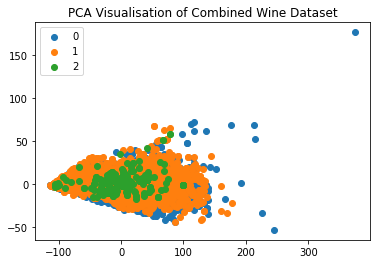

In [25]:
counter = Counter(wines['quality_label'])
pca = PCA(n_components=2)
wines_pca = pca.fit_transform(wines)
for label, _ in counter.items():
    row_ix = where(wines['quality_label'] == label)[0]
    plt.scatter(wines_pca[row_ix, 0], wines_pca[row_ix, 1], label=str(label))
plt.legend()
plt.title("PCA Visualisation of Combined Wine Dataset")
plt.show()

Low quality wines are outliers mainly

### Normalizing data

In [26]:
X = wines.iloc[: , :-2]
y = wines.iloc[:,-1:]

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [28]:
X.shape

(6497, 12)

In [29]:
wines.shape

(6497, 14)

### Splitting into Train Test sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=20)

In [32]:
X_train.shape #check

(5197, 12)

In [33]:
X_test.shape

(1300, 12)

In [34]:
y_train.shape

(5197, 1)

In [35]:
y_test.shape

(1300, 1)

## Modelling

### Knn

With Standard knn on all types of data.
As per literature, the optimal K value usually found is the square root of N, where N is the total number of samples

In [36]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = {'accuracy' : make_scorer(accuracy_score),
           'f1_score' : make_scorer(f1_score, average='macro')}

In [37]:
knn_clf = KNeighborsClassifier()

In [38]:
knn_clf.fit(X_train,np.ravel(y_train))
#knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
cv_scores = cross_validate(knn_clf, X_train, np.ravel(y_train), cv=cv)
#cv_scores = cross_validate(knn_clf, X_train, y_train, cv=cv)

In [40]:
print("Mean Cross validation Scores", np.mean(cv_scores['test_score']))

Mean Cross validation Scores 0.7229124055135616


In [41]:
cv_scores

{'fit_time': array([0.0089736 , 0.00753689, 0.00712824, 0.00706673, 0.00703478,
        0.00730395, 0.00725365, 0.00705266, 0.00709867, 0.00704503]),
 'score_time': array([0.0329268 , 0.03862214, 0.0326755 , 0.03553343, 0.03375435,
        0.04185247, 0.03477836, 0.03622055, 0.03296971, 0.03710365]),
 'test_score': array([0.71923077, 0.72307692, 0.71730769, 0.725     , 0.73269231,
        0.72884615, 0.73846154, 0.70520231, 0.73603083, 0.70327553])}

Hyperparameter Tuning

In [42]:
param_grid = {'n_neighbors': list(range(3,50,2)),
              'weights':['uniform', 'distance']
              }

In [43]:
f1_sc = make_scorer(f1_score, average='micro')

In [44]:
grid_knn_estimator = model_selection.GridSearchCV(knn_clf,
                                                 param_grid,
                                                 scoring=f1_sc,
                                                 refit=True,
                                                 cv=3,
                                                 return_train_score=True)

In [45]:
knn_model = grid_knn_estimator.fit(X_train,np.ravel(y_train))

In [46]:
print('Optimum parameters', knn_model.best_params_)

Optimum parameters {'n_neighbors': 31, 'weights': 'distance'}


#### Parameter selection graphs and tables

In [47]:
n_neighborss = list(range(3,41,2))

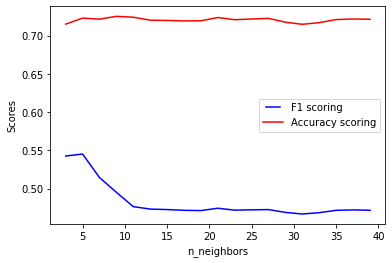

In [48]:
f1_results = []
accuracy_results = []
#roc_auc_results = []

for n_neighbors in n_neighborss:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, np.ravel(y_train))
    f1_scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=cv, scoring = 'f1_macro')
    accuracy_scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=cv, scoring = 'accuracy')
    #roc_auc_scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=cv, scoring = 'roc_auc')
    f1_results.append(np.mean(f1_scores))
    accuracy_results.append(np.mean(accuracy_scores))
    #roc_auc_results.append(np.mean(roc_auc_scores))
  
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_neighborss, f1_results, 'b', label="F1 scoring")
line2, = plt.plot(n_neighborss, accuracy_results, 'r', label="Accuracy scoring")
#line3, = plt.plot(n_neighborss, roc_auc_results, 'g', label="ROC AUC scoring")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Scores')
plt.xlabel('n_neighbors')
plt.show()

Training with optimum parameters

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors= 31,
                               weights = 'distance'
                              )

In [50]:
knn_clf.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=31, weights='distance')

In [51]:
cv_scores = cross_validate(knn_clf, X_train, np.ravel(y_train), cv=cv, scoring = scoring)

In [52]:
print("Mean Cross validation Scores after Hyperparameter Tuning|", np.mean(cv_scores['test_f1_score']))

Mean Cross validation Scores after Hyperparameter Tuning| 0.6673720535123226


On the test set

In [53]:
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)

Model Score

In [54]:
print("Score for Training set",knn_clf.score(X_train, y_train))
print("Score for Testing set",knn_clf.score(X_test, y_test))

Score for Training set 1.0
Score for Testing set 0.8038461538461539


Getting the confusion matrix for prediction on the test set

In [55]:
confusion_matrix(y_test, y_test_pred_knn)

array([[314, 163,   0],
       [ 67, 716,   0],
       [  1,  24,  15]])

In [56]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       477
           1       0.79      0.91      0.85       783
           2       1.00      0.38      0.55        40

    accuracy                           0.80      1300
   macro avg       0.87      0.65      0.71      1300
weighted avg       0.81      0.80      0.80      1300



Note to self: Oversample underrepresented classes ASAP
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### Naïve Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score, accuracy_score

In [58]:
nb_clf = GaussianNB()

In [59]:
nb_clf.fit(X_train,np.ravel(y_train))

GaussianNB()

In [60]:
# Predict
y_nb_train_pred = nb_clf.predict(X_train)
y_nb_test_pred = nb_clf.predict(X_test)
# Print accuracy
print("score for Training set",nb_clf.score(X_train, y_train))
print("score for Testing set",nb_clf.score(X_test, y_test))
#print(y_nb_test_pred)

score for Training set 0.6109293823359631
score for Testing set 0.5969230769230769


In [61]:
print("Score for Training set",nb_clf.score(X_train, y_train))
print("Score for Testing set",nb_clf.score(X_test, y_test))

Score for Training set 0.6109293823359631
Score for Testing set 0.5969230769230769


In [62]:
cv_scores = cross_validate(nb_clf, X_train, np.ravel(y_train), cv=cv, scoring = scoring)

In [63]:
print("Mean Cross validation Scores for NB|", np.mean(cv_scores['test_f1_score']))

Mean Cross validation Scores for NB| 0.46321641473034303


Classification Report for NB

In [64]:
print(classification_report(y_test, y_nb_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       477
           1       0.66      0.71      0.68       783
           2       0.10      0.17      0.13        40

    accuracy                           0.60      1300
   macro avg       0.44      0.44      0.43      1300
weighted avg       0.60      0.60      0.60      1300



In [65]:
mnb_clf = MultinomialNB()

In [66]:
mnb_clf.fit(X_train,np.ravel(y_train))

MultinomialNB()

In [67]:
# Predict
y_mnb_train_pred = mnb_clf.predict(X_train)
y_mnb_test_pred = mnb_clf.predict(X_test)
# Print accuracy
print("score for Training set",mnb_clf.score(X_train, y_train))
print("score for Testing set",mnb_clf.score(X_test, y_test))
#print(y_nb_test_pred)

score for Training set 0.6026553781027516
score for Testing set 0.6023076923076923


In [68]:
cv_scores = cross_validate(mnb_clf, X_train, np.ravel(y_train), cv=cv, scoring = scoring)

In [69]:
print("Mean Cross validation Scores for MNB", np.mean(cv_scores['test_f1_score']))

Mean Cross validation Scores for MNB 0.25069037230276725


### SVM

In [70]:
from sklearn.svm import SVC, SVR

In [71]:
svm_clf = SVC()
svm_clf.fit(X_train, np.ravel(y_train))

SVC()

In [72]:
y_svm_test_pred = svm_clf.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_svm_test_pred))
print('Score', svm_clf.score(X_test, y_test))
print(classification_report(y_test, y_svm_test_pred))

Mean Squared Error: 0.27307692307692305
Score 0.7292307692307692
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       477
           1       0.73      0.89      0.80       783
           2       0.00      0.00      0.00        40

    accuracy                           0.73      1300
   macro avg       0.49      0.47      0.47      1300
weighted avg       0.71      0.73      0.71      1300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

Grid estimator doesnt run well on colab <br>
After running on local jupyter <br>
{'criterion': 'gini', 'n_estimators': 74}

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [74]:
rf_clf = RandomForestClassifier(n_estimators=74,random_state=20)
rf_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=74, random_state=20)

In [75]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 74,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20,
 'verbose': 0,
 'warm_start': False}

In [76]:
y_rf_test_pred = rf_clf.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf_test_pred))
print('Score', rf_clf.score(X_test, y_test))
#print(y_rf_test_pred)

Mean Squared Error: 0.17384615384615384
Score 0.8261538461538461


In [77]:
print(classification_report(y_test, y_rf_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       477
           1       0.82      0.91      0.86       783
           2       1.00      0.38      0.55        40

    accuracy                           0.83      1300
   macro avg       0.88      0.67      0.73      1300
weighted avg       0.83      0.83      0.82      1300



Look at implementing balanced Random Forest
 https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb

### Voting Classifier with knn, svm, rf, nb

Look at putting in a voting classifier ensemble and a plot of how ensemble performs better 
https://machinelearningmastery.com/bagging-ensemble-with-different-data-transformations/

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [79]:
clf1 = SVC()
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=31, weights='distance')
clf4 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('svc', clf1), ('rf', clf2), ('knn', clf3), ('nb', clf4)], voting='hard'#, weights=[1,2,2]
    )

In [80]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [81]:

accuracy_results = list()
f1_results = list()
mse_result = list()
for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Support Vector Classification', 'Random Forest', 'Knn', 'Naive Bayes','Ensemble']):
    scores = cross_val_score(clf, X_train, np.ravel(y_train.values), scoring='accuracy', cv=cv)
    f1_scores = cross_val_score(clf, X_train, np.ravel(y_train.values), scoring='f1_macro', cv=cv)
    mse_scores = cross_val_score(clf, X_train, np.ravel(y_train.values), cv = cv, scoring='neg_mean_squared_error')
    accuracy_results.append(scores)
    f1_results.append(f1_scores)
    mse_result.append(mse_scores)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    clf.fit(X_train,np.ravel(y_train.values))
    print("Classification Report \n", classification_report(y_test, clf.predict(X_test),\
                                                            labels = np.unique(clf.predict(X_test))))

Cross Validation Accuracy: 0.72 (+/- 0.02) [Support Vector Classification]
Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62       477
           1       0.73      0.89      0.80       783

   micro avg       0.73      0.75      0.74      1260
   macro avg       0.73      0.71      0.71      1260
weighted avg       0.73      0.75      0.73      1260

Cross Validation Accuracy: 0.80 (+/- 0.02) [Random Forest]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       477
           1       0.82      0.91      0.86       783
           2       1.00      0.38      0.55        40

    accuracy                           0.83      1300
   macro avg       0.88      0.67      0.73      1300
weighted avg       0.83      0.83      0.82      1300

Cross Validation Accuracy: 0.79 (+/- 0.01) [Knn]
Classification Report 
               precision    recall  f1

#### Ensemble 1 Performance

#### Accuracy Performance Comparison of Ensemble 1

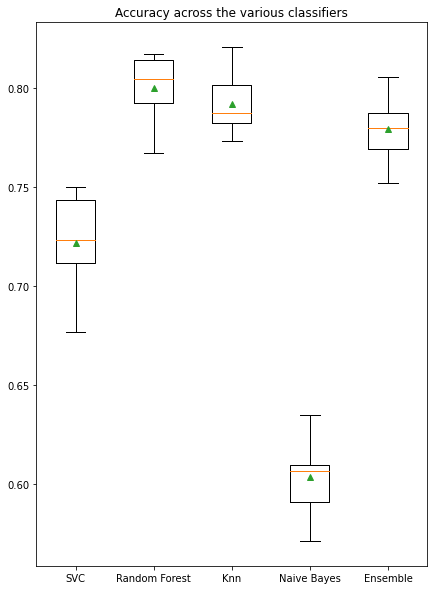

In [82]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(accuracy_results, labels=[n for n in (['SVC', 'Random Forest', 'Knn', 'Naive Bayes','Ensemble'] )], showmeans=True)
plt.title("Accuracy across the various classifiers")
plt.show()

#### F1 Scores  Comparison of Ensemble 1

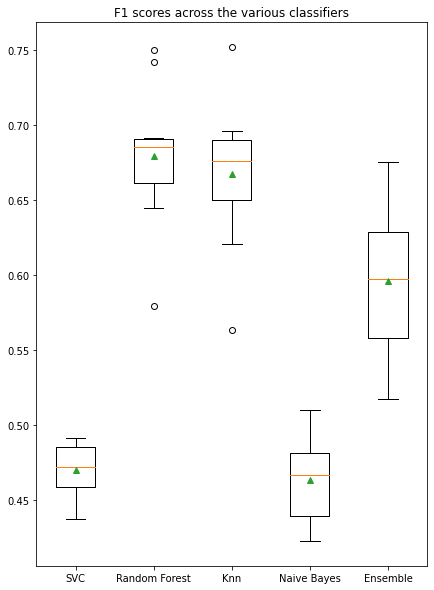

In [83]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(f1_results, labels=[n for n in (['SVC', 'Random Forest', 'Knn', 'Naive Bayes','Ensemble'] )], showmeans=True)
plt.title("F1 scores across the various classifiers")
plt.show()

#### MSE Scores  Comparison of Ensemble 1

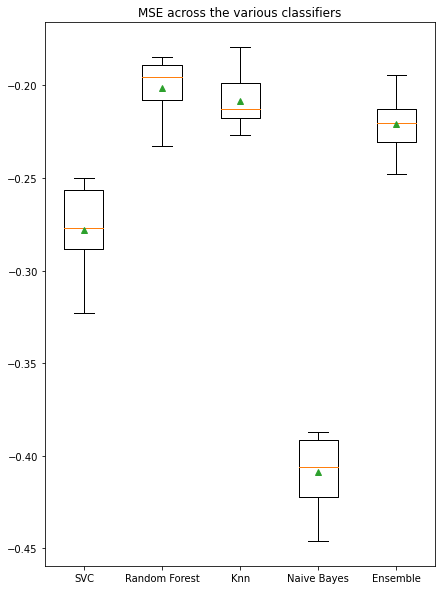

In [84]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(mse_result, labels=[n for n in (['SVC', 'Random Forest', 'Knn', 'Naive Bayes','Ensemble'] )], showmeans=True)
plt.title("MSE across the various classifiers")
plt.show()

### Voting Classifier with Rf and knn

In [85]:
eclf2 = VotingClassifier(
    estimators=[ ('rf', clf2), ('knn', clf3)], voting='hard'#, weights=[1,2,2]
    )

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


accuracy_results = list()
f1_results = list()
mse_result = list()
for clf, label in zip([ clf2, clf3, eclf2], ['Random Forest', 'Knn','Ensemble']):
    scores = cross_val_score(clf, X_train, np.ravel(y_train.values), scoring='accuracy', cv=cv)
    f1_scores = cross_val_score(clf, X_train, np.ravel(y_train.values), scoring='f1_macro', cv=cv)
    mse_scores = cross_val_score(clf, X_train, np.ravel(y_train.values), cv = cv, scoring='neg_mean_squared_error')
    accuracy_results.append(scores)
    f1_results.append(f1_scores)
    mse_result.append(mse_scores)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    clf.fit(X_train,np.ravel(y_train.values))
    print("Classification Report \n", classification_report(y_test, clf.predict(X_test),\
                                                            labels = np.unique(clf.predict(X_test))))

Cross Validation Accuracy: 0.80 (+/- 0.02) [Random Forest]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       477
           1       0.82      0.91      0.86       783
           2       1.00      0.38      0.55        40

    accuracy                           0.83      1300
   macro avg       0.88      0.67      0.73      1300
weighted avg       0.83      0.83      0.82      1300

Cross Validation Accuracy: 0.79 (+/- 0.01) [Knn]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.66      0.73       477
           1       0.79      0.91      0.85       783
           2       1.00      0.38      0.55        40

    accuracy                           0.80      1300
   macro avg       0.87      0.65      0.71      1300
weighted avg       0.81      0.80      0.80      1300

Cross Validation Accuracy: 0.80 (+/- 0.02) [Ensemble]
Classification Report 
     

#### Ensemble 2 Performance

##### Accuracy Performance Comparison of Ensemble 2

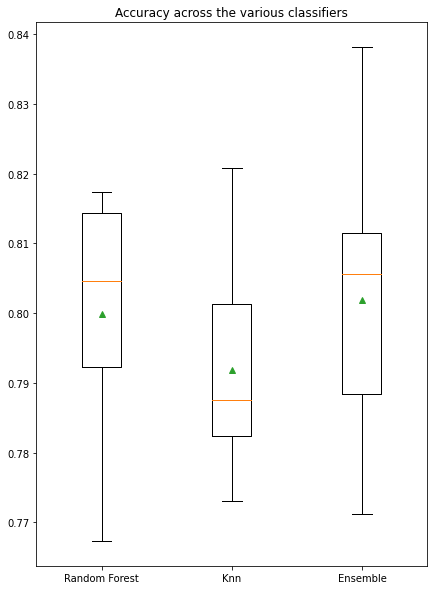

In [86]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(accuracy_results, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("Accuracy across the various classifiers")
plt.show()

##### F1 Scores Performance Comparison of Ensemble 2

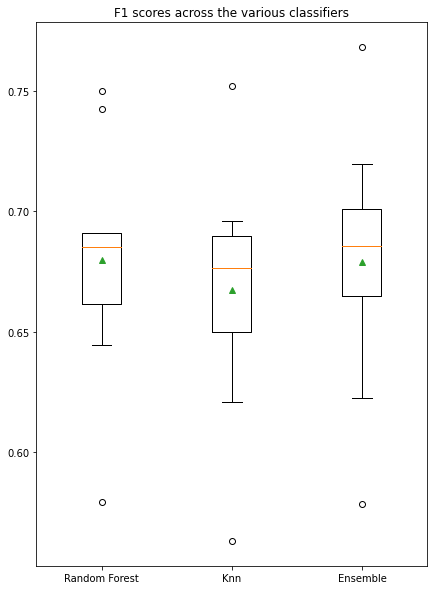

In [87]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(f1_results, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("F1 scores across the various classifiers")
plt.show()

##### MSE Scores Comparison of Ensemble 2

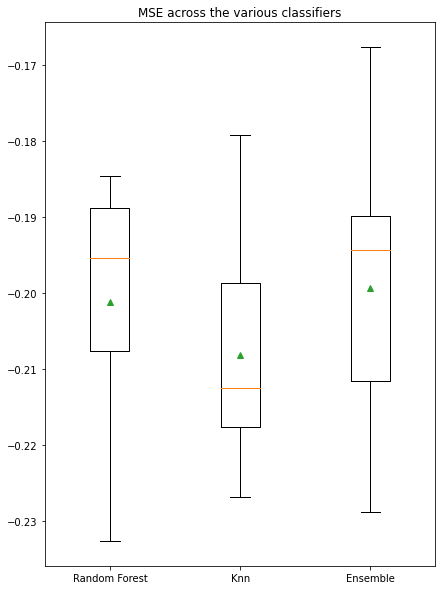

In [88]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(mse_result, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("MSE across the various classifiers")
plt.show()

Ensemble 3 with oversampling

In [89]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
X = wines.iloc[: , :-2]
y = wines.iloc[:,-1:]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=20)
sampling_strategy = {2: 1000 }
oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
X_over, y_over = oversample.fit_resample(X_train, y_train)

Post Classification

### Voting Classifier with Oversampling rf and knn

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
X = wines.iloc[: , :-2]
y = wines.iloc[:,-1:]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=20)
sampling_strategy = {2: 1000 }
oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [95]:
eclf3 = VotingClassifier(
    estimators=[ ('rf', clf2), ('knn', clf3)], voting='hard'#, weights=[1,2,2]
    )

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


accuracy_results = list()
f1_results = list()
mse_result = list()
for clf, label in zip([ clf2, clf3, eclf3], ['Random Forest', 'Knn','Ensemble']):
    scores = cross_val_score(clf, X_over, np.ravel(y_over.values), scoring='accuracy', cv=cv)
    f1_scores = cross_val_score(clf, X_over, np.ravel(y_over.values), scoring='f1_macro', cv=cv)
    mse_scores = cross_val_score(clf, X_over, np.ravel(y_over.values), cv = cv, scoring='neg_mean_squared_error')
    accuracy_results.append(scores)
    f1_results.append(f1_scores)
    mse_result.append(mse_scores)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    clf.fit(X_over,np.ravel(y_over.values))
    print("Classification Report \n", classification_report(y_test, clf.predict(X_test),\
                                                            labels = np.unique(clf.predict(X_test))))

Cross Validation Accuracy: 0.85 (+/- 0.01) [Random Forest]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       477
           1       0.82      0.91      0.86       783
           2       1.00      0.40      0.57        40

    accuracy                           0.82      1300
   macro avg       0.88      0.68      0.73      1300
weighted avg       0.83      0.82      0.82      1300

Cross Validation Accuracy: 0.80 (+/- 0.01) [Knn]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.65      0.73       477
           1       0.79      0.84      0.81       783
           2       0.25      0.55      0.34        40

    accuracy                           0.76      1300
   macro avg       0.62      0.68      0.63      1300
weighted avg       0.78      0.76      0.77      1300

Cross Validation Accuracy: 0.85 (+/- 0.01) [Ensemble]
Classification Report 
     

#### Ensemble 3 Performance

##### Accuracy Performance Comparison of Ensemble 3

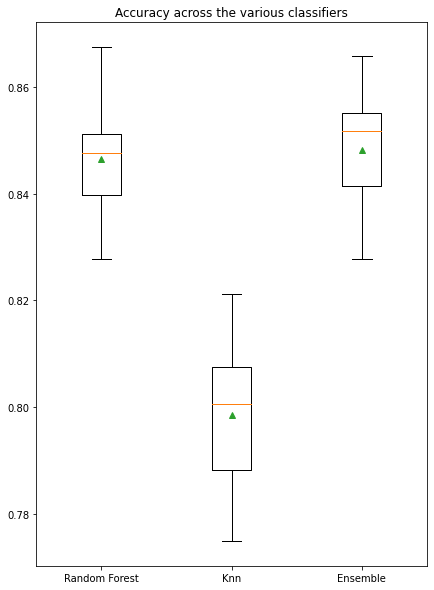

In [96]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(accuracy_results, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("Accuracy across the various classifiers")
plt.show()

##### F1 Scores Performance Comparison of Ensemble 3

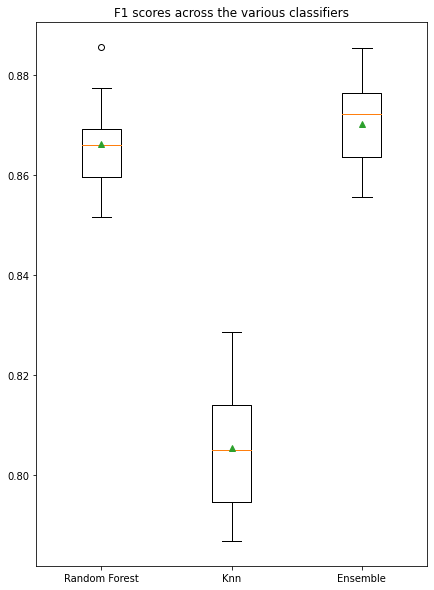

In [97]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(f1_results, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("F1 scores across the various classifiers")
plt.show()

##### MSE Scores Comparison of Ensemble 3

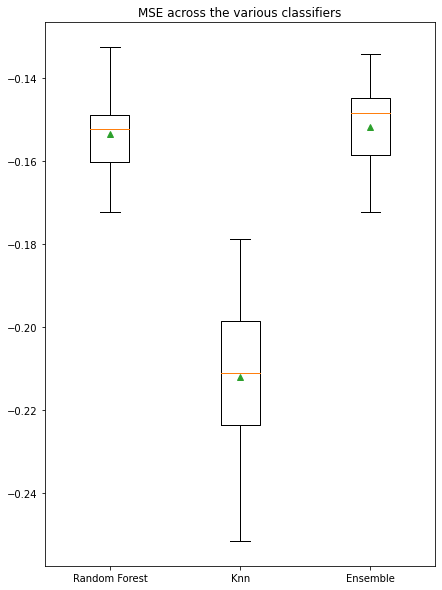

In [98]:
plt.rcParams['figure.figsize'] = (7, 10)
plt.boxplot(mse_result, labels=[n for n in (['Random Forest', 'Knn','Ensemble'] )], showmeans=True)
plt.title("MSE across the various classifiers")
plt.show()